In [5]:
import pandas as pd
invoices_df = pd.read_csv("fct_invoice.csv")
invoices_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [8]:
#Easy 1: How many unique customers are in the dataset?

In [11]:
unique_customers = invoices_df["customer_id"].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 5191


In [12]:
#Easy 2: What are the different categories of products available? How many unique categories are there?

In [16]:
unique_categories = invoices_df["category"].unique()
print("Unique product categories:")
print(unique_categories)

unique_categories = invoices_df["category"].nunique()
print("Number of unique product categories:", unique_categories)

Unique product categories:
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique product categories: 8


In [17]:
#Easy 3: Which payment method is the most popular? How many times was it used?

In [19]:
popular_payment_method = invoices_df["payment_method"].value_counts().idxmax()
popular_payment_count = invoices_df["payment_method"].value_counts().max()
print("Most popular payment method:", popular_payment_method)
print("Number of times used:", popular_payment_count)

Most popular payment method: Cash
Number of times used: 44447


In [20]:
#Medium 1:What are the three most popular categories, by total sales?

In [26]:
invoices_df["total_sales"] = invoices_df["quantity"] * invoices_df["price"]
category_sales = invoices_df.groupby("category")["total_sales"].sum()

top_three_categories = category_sales.nlargest(3)
print("The three most popular categories by total sales:")
print(top_three_categories)

The three most popular categories by total sales:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [27]:
#Medium 2:What are the total sales attributed to customers over the age of 45?

In [28]:
import json

with open("dim_customer.json") as json_file:
    data = json.load(json_file)

column_headers = list(data.keys())

print("Column headers in the dim_customer.json file:")
print(column_headers)

Column headers in the dim_customer.json file:
['age', 'first_name', 'gender', 'id', 'last_name']


In [30]:
df_customers = pd.DataFrame(data)
df_merged = invoices_df.merge(df_customers, left_on="customer_id", right_on="id")
df_merged

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [31]:
df_customers_over_45 = df_merged[df_merged["age"] > 45]

total_sales_over_45 = df_customers_over_45["total_sales"].sum()
print("Total sales attributed to customers over the age of 45:", total_sales_over_45)

Total sales attributed to customers over the age of 45: 82039768.15


In [32]:
#Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

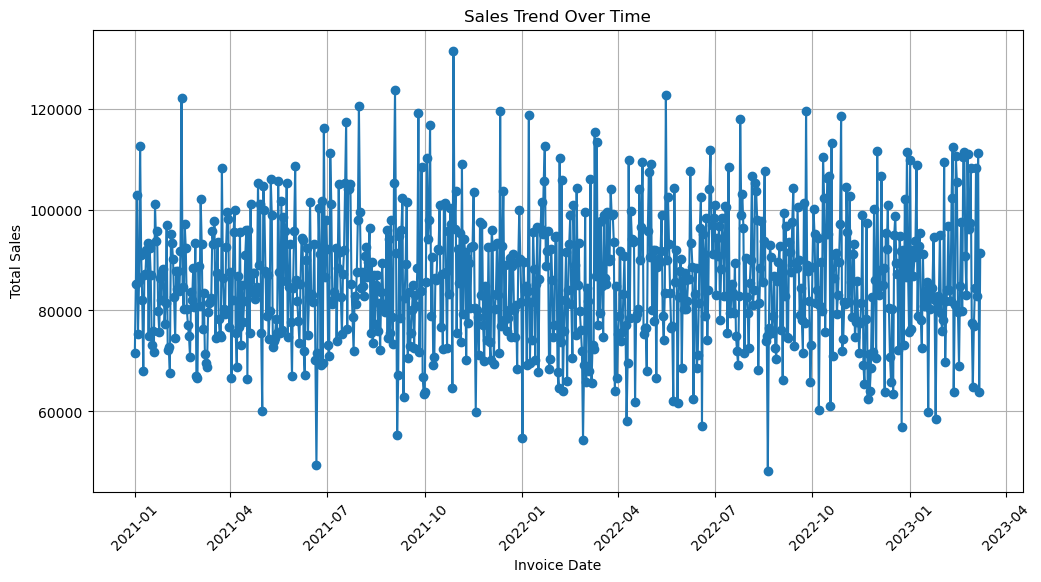

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

invoices_df["invoice_date"] = pd.to_datetime(invoices_df["invoice_date"], format="%d/%m/%Y")

sales_by_date = invoices_df.groupby("invoice_date")["price"].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
#Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

In [ ]:
import pandas as pd
import json

with open("dim_customer.json") as json_file:
    data = json.load(json_file)
df_customers = pd.DataFrame(data)

df_merged = df.merge(df_customers, left_on="customer_id", right_on="id")

df_merged["decade_age_range"] = (df_merged["age"] // 10) * 10

pivot_table_sales = pd.pivot_table(df_merged, values="price", index="category", columns="decade_age_range", aggfunc="sum", fill_value=0)

display(pivot_table_sales)